In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from matminer.datasets import load_dataset
import pandas as pd
from monty.serialization import loadfn, dumpfn
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

from pymatgen.ext.matproj import MPRester
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

# Seaborn and Matplotlib are tools we use to plot professional figures. It's important to visualize your data in a way that looks appealing and conveys the idea you are communicating

### Plotting some car data with MPG against Horsepower using a Relationship Plot. The double-legend shows origin country with color and weight with size. Relplots are useful for showing relationship across 2 variables when you have different subgroups

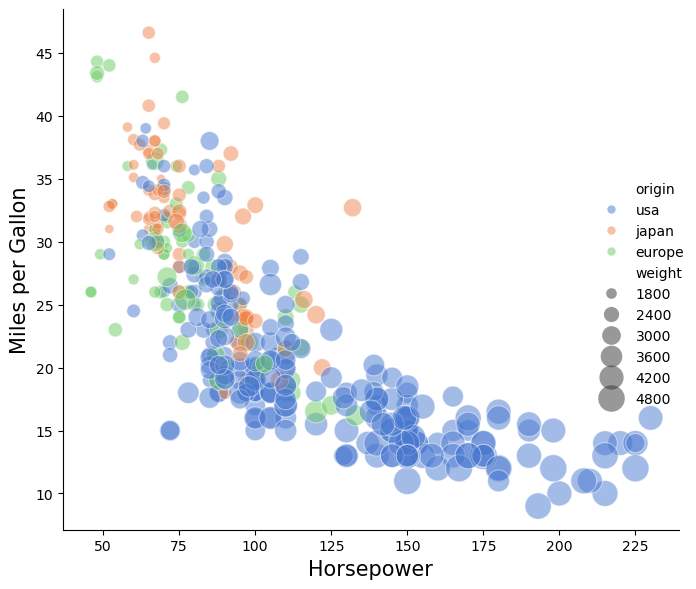

In [63]:
mpg = sns.load_dataset("mpg") #preloaded dataset from Seaborn

# Plot miles per gallon against horsepower with weight and origin subcategories
ax = sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)
ax.set_xlabels('Horsepower', fontsize=15)
ax.set_ylabels('Miles per Gallon', fontsize=15)
ax.set_titles('Car Data RelPlot')

plt.tight_layout()

## We can also use Pymatgen, a python package for materials research, to make cool chemistry plots

![Alt Text](voltage_curve.png)

![Alt Text](pheh_windows.png)

![Alt Text](redoxplot.png)

# Visualizing ML Results

### We can visualize our machine learning results using a parity plot to visually compare how our model's predicting accuracy performs compared to the true values. We can put the model's predictions on one axis and the true values on the other. Perfect predictions would mean that all our data points are on the dashed line y=x

<Figure size 1500x1500 with 0 Axes>

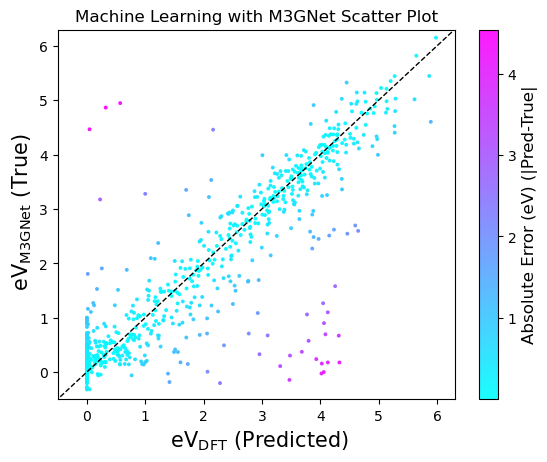

In [53]:
plt.figure(figsize=(15,15))
newdata = pd.read_csv('./final_CleanedGenM3gPred.csv')
newy_pred = newdata['y_pred']
newy_true = newdata['y_true']
newerror = newdata['abs_error (true-pred)']

newy_pred = np.array(newy_pred)
newy_true = np.array(newy_true)


fig, ax = plt.subplots()

points = ax.scatter(
    x=newdata['y_true'],
    y=newdata['y_pred'],
    c=newdata['abs_error (true-pred)'],        # Numeric column
    cmap='cool',
    s=13,
    alpha=0.9,
    marker='.'
)

cbar = plt.colorbar(points, ax=ax)
cbar.set_label('Absolute Error (eV) (|Pred-True|', fontsize=12)

min_val = min(newdata['y_true'].min(), newdata['y_pred'].min())
max_val = max(newdata['y_true'].max(), newdata['y_pred'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label='y = x')
plt.xlim([-0.5, 6.3])
plt.ylim([-0.5, 6.3])
plt.xlabel(r' eV$_{\text{DFT}}$ (Predicted)', fontsize=15)
plt.ylabel(r' eV$_{\text{M3GNet}}$ (True)', fontsize=15)
plt.title('Machine Learning with M3GNet Scatter Plot')
plt.tight_layout
plt.show()

### We can also show this data as a probability distribution instead of plotting the raw data as a scatter plot. Darker colors mean a greater distrubution of the data

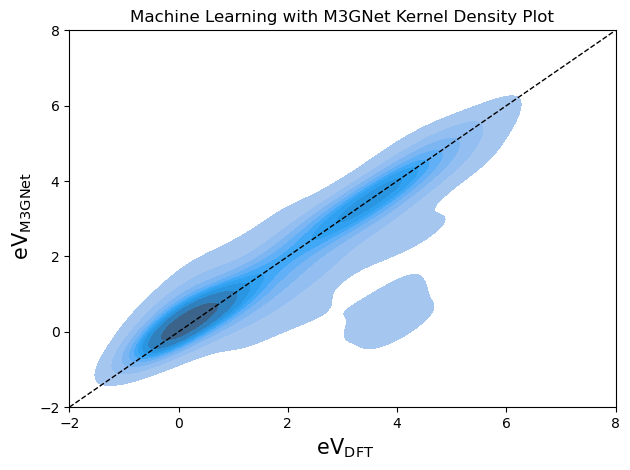

In [25]:
ax = sns.kdeplot(x=newy_true, y=newy_pred, fill=True)
ax.set_ylabel(r' eV$_{\text{M3GNet}}$', fontsize=15)
ax.set_xlabel(r' eV$_{\text{DFT}}$', fontsize=15)
ax.set_title('Machine Learning with M3GNet Kernel Density Plot')
ax.set_xlim([-2,8])
ax.set_ylim([-2,8])
ax.plot([-2, 8], [-2, 8], 'k--', linewidth=1)
plt.tight_layout()

### We can change the colorway, axis titles and sizes, and other parameters to plot however we want

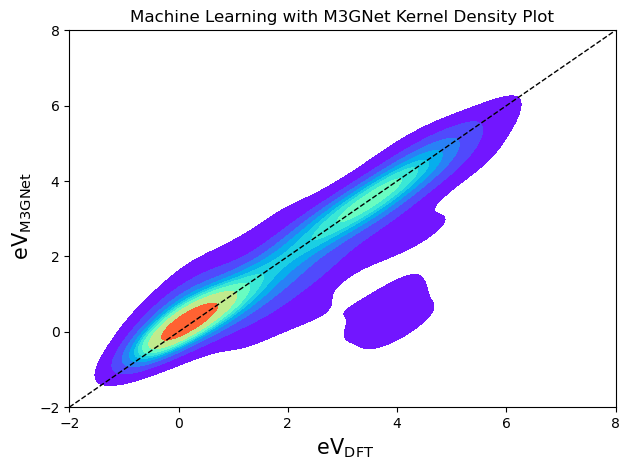

In [32]:
ax = sns.kdeplot(x=newy_true, y=newy_pred, fill=True, cmap='rainbow')
ax.set_ylabel(r' eV$_{\text{M3GNet}}$', fontsize=15) #Change the Red Quotations to Change the Y Axis Title
ax.set_xlabel(r' eV$_{\text{DFT}}$', fontsize=15) #Change the Red Quotations to Change the X Axis Title
ax.set_title('Machine Learning with M3GNet Kernel Density Plot') #Change the Red Quotations to Change the Title
ax.set_ylim([-2,8])
ax.plot([-2, 8], [-2, 8], 'k--', linewidth=1)
plt.tight_layout()

# Heatmaps are useful for displaying a lot of data at once and comparing them relative to each other. Below are some energy calculations for organic metal halide hybrids. 
### They are plotted by color using Erelative, which compares reported experimental energy values to see what other compound may be able to be synthesized based on thermodynamics which is useful for experimentalists to know which compounds to try to make. 
### In this plot, green is good to synthesize, yellow is okay, and red is bad. Black outlined boxes are the experimentally reported compounds that scientists have already made.

In [38]:
data2 = pd.read_excel('./metalswap_data.xlsx', sheet_name='0D2+') #Loading my excel sheet with data
data2 = data2.pivot(index='Organic Precursor', columns='Substituted Metal Halide', values='E_relative') #Swapping orientation of data to plot

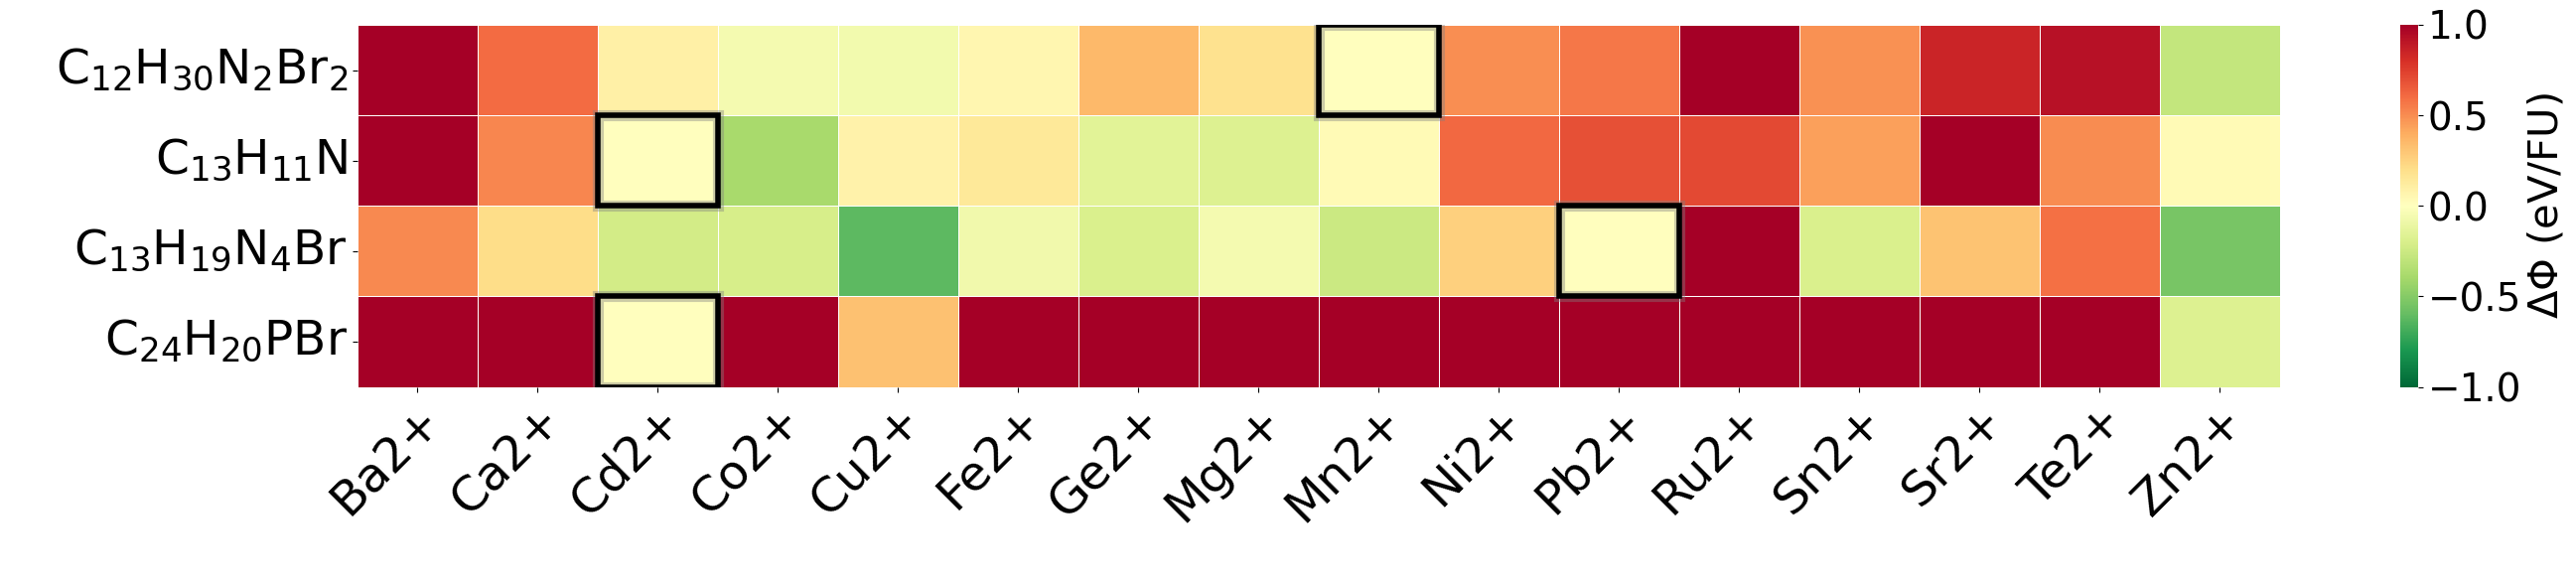

In [37]:
plt.figure(figsize=(28, 6))
ax = sns.heatmap(
    data2,
    annot=False,
    cmap='RdYlGn_r',
    linewidths=0.5,             
    linecolor='white',          
    annot_kws={"size": 20},
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'E_relative (eV/FU)'}
)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.ax.tick_params(labelsize=28)
colorbar.set_label(r"$\Delta \Phi$ (eV/FU)", fontsize=30)  
precursor_rows = [
    r"C$_{12}$H$_{30}$N$_2$Br$_2$",
    r"C$_{13}$H$_{11}$N",
    r"C$_{13}$H$_{19}$N$_4$Br",
    r"C$_{24}$H$_{20}$PBr",
]
ax.set_xlabel(' ', fontsize=30)
ax.set_ylabel(' ', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=35)
ax.set_yticklabels(precursor_rows, rotation=0, fontsize=35)
exp_cells = [
    ('C12H30N2Br2', 'Mn2+'),
    ('C13H11N', 'Cd2+'),
    ('C13H19N4Br', 'Pb2+'),
    ('C24H20PBr', 'Cd2+')
]
for row_label, col_label in exp_cells:
    row = data2.index.get_loc(row_label)
    col = data2.columns.get_loc(col_label)
    rect_outer = patches.Rectangle(
        (col, row),
        1,
        1,
        fill=False,
        edgecolor='gray',
        linewidth=8,
        alpha=0.4,
        zorder=2
    )
    ax.add_patch(rect_outer)
    rect_inner = patches.Rectangle(
        (col, row),
        1,
        1,
        fill=False,
        edgecolor='black',
        linewidth=4,
        zorder=3
    )
    ax.add_patch(rect_inner)
plt.tight_layout()
plt.show()


### I can also annotate the boxes so we can see their relative value

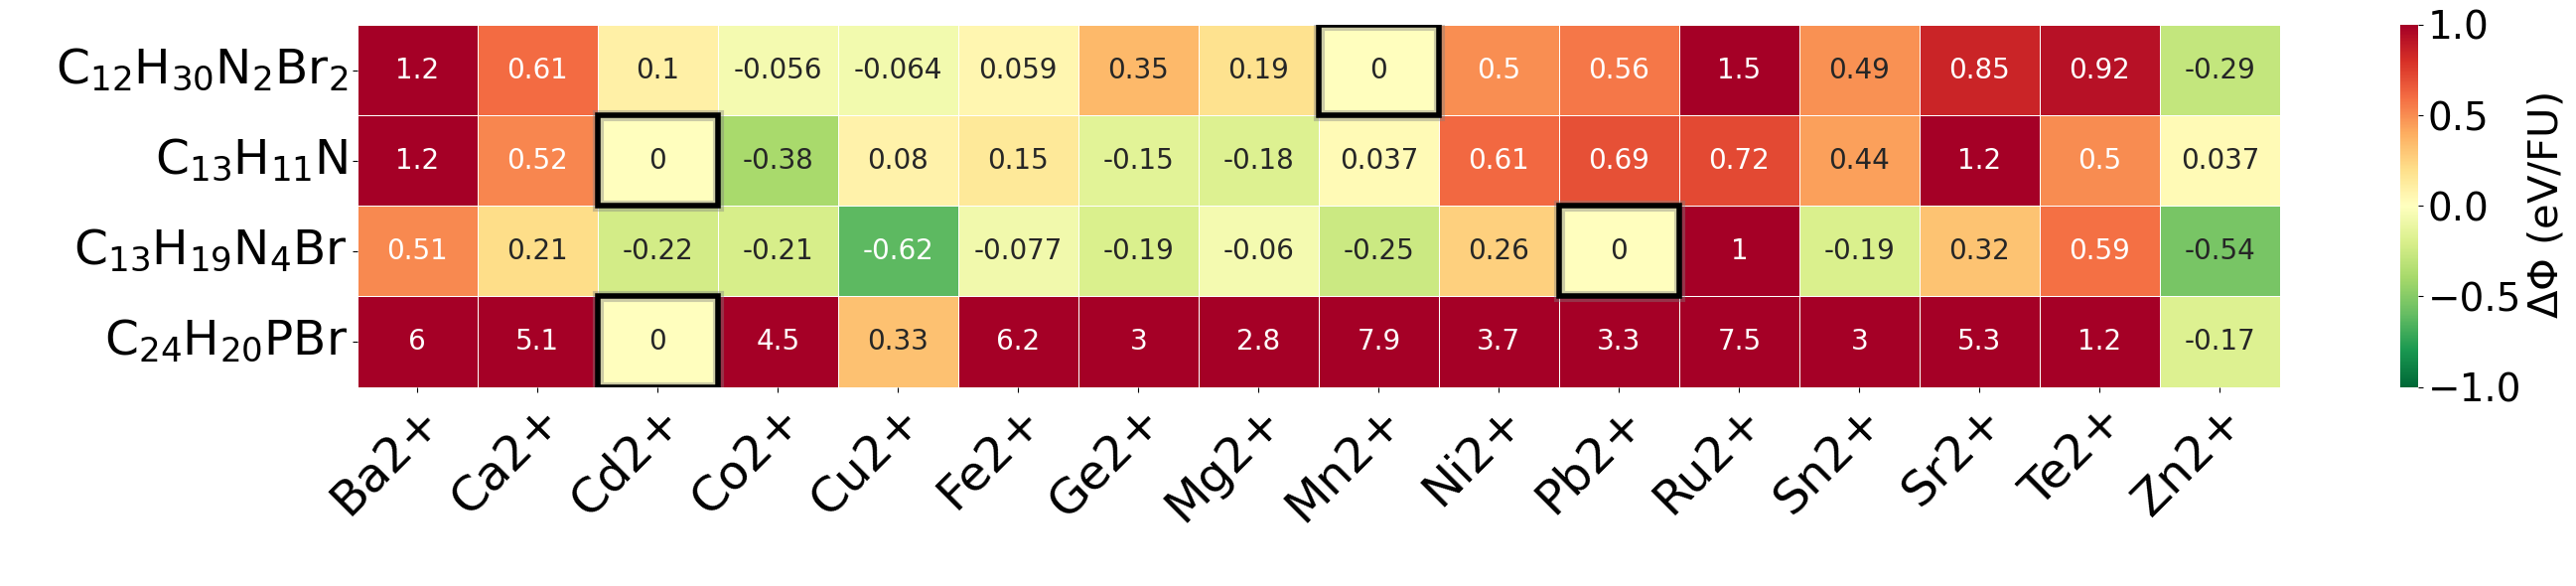

In [40]:
plt.figure(figsize=(28, 6))
ax = sns.heatmap(
    data2,
    annot=True, #change annot to True
    cmap='RdYlGn_r',
    linewidths=0.5,             
    linecolor='white',          
    annot_kws={"size": 20},
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'E_relative (eV/FU)'}
)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.ax.tick_params(labelsize=28)
colorbar.set_label(r"$\Delta \Phi$ (eV/FU)", fontsize=30)  
precursor_rows = [
    r"C$_{12}$H$_{30}$N$_2$Br$_2$",
    r"C$_{13}$H$_{11}$N",
    r"C$_{13}$H$_{19}$N$_4$Br",
    r"C$_{24}$H$_{20}$PBr",
]
ax.set_xlabel(' ', fontsize=30)
ax.set_ylabel(' ', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=35)
ax.set_yticklabels(precursor_rows, rotation=0, fontsize=35)
exp_cells = [
    ('C12H30N2Br2', 'Mn2+'),
    ('C13H11N', 'Cd2+'),
    ('C13H19N4Br', 'Pb2+'),
    ('C24H20PBr', 'Cd2+')
]
for row_label, col_label in exp_cells:
    row = data2.index.get_loc(row_label)
    col = data2.columns.get_loc(col_label)
    rect_outer = patches.Rectangle(
        (col, row),
        1,
        1,
        fill=False,
        edgecolor='gray',
        linewidth=8,
        alpha=0.4,
        zorder=2
    )
    ax.add_patch(rect_outer)
    rect_inner = patches.Rectangle(
        (col, row),
        1,
        1,
        fill=False,
        edgecolor='black',
        linewidth=4,
        zorder=3
    )
    ax.add_patch(rect_inner)
plt.tight_layout()
plt.show()
